In [113]:
# get scores from sagemaker aws private workforces

from boto3 import client
import boto3
import json
import pandas as pd

s3 = boto3.resource('s3')
col_names =  ['image', 'label']
my_df  = pd.DataFrame(columns = col_names)

conn = client('s3')  # again assumes boto.cfg setup, assume AWS S3

for key in conn.list_objects(Bucket='workattr',Prefix='iteration-1')['Contents']:
    
    content_object = s3.Object('workattr', key['Key'])
    
    body=content_object.get()['Body'].read()
    
    my_json = body.decode('utf8').replace("'", '"')
    
    data = json.loads(my_json)
    
    for x in data:
        
        my_df.loc[len(my_df)] = [x['dataObject']['s3Uri'],x['annotations'][0]['annotationData']['content'][36]]

my_df.sort_values("image", inplace = True) 
    
my_df.to_excel("latino_male_21.xlsx") 



In [28]:
# get scores from sagemaker aws public workforces - AMT

from boto3 import client
import boto3
import json
import pandas as pd

s3 = boto3.resource('s3')
col_names =  ['image','rater','label']
my_df  = pd.DataFrame(columns = col_names)

conn = client('s3')  # again assumes boto.cfg setup, assume AWS S3

for key in conn.list_objects(Bucket='workattr',Prefix='iteration-2')['Contents']:
    
    content_object = s3.Object('workattr', key['Key'])
    
    body=content_object.get()['Body'].read()
    
    my_json = body.decode('utf8').replace("'", '"')
    
    data = json.loads(my_json)
    
    for x in data:
         
        for y in x['annotations']:
            my_df.loc[len(my_df)] = [x['dataObject']['s3Uri'],y['workerId'],y['annotationData']['content']]

my_df.sort_values("image", inplace = True) 

#my_df['image'] = my_df['image'].str.replace(r'\D', '') 
my_df['label']= my_df['label'].str.replace(r'{"crowd-image-classifier":{"label":"', '') 
my_df['image']= my_df['image'].str.replace(r's3://ecust-fbp-male/', '')  
my_df['rater']= my_df['rater'].str.replace(r'public.us-east-1.', '')  
my_df['label']= my_df['label'].str.replace(r'"}}', '') 
my_df.to_excel("public_date_all5_2.xlsx")
#my_df

In [143]:
#create score matrix - private scores
import os
import pandas as pd
DIR ='/home/ec2-user/SageMaker/private_generic')
files = os.listdir(DIR)
files_xls = [f for f in files if f[-4:] == 'xlsx']

df=pd.DataFrame(columns = ['image','label'])
prefix_x=''

for f in files_xls:
    prefix_y=f
    data = pd.read_excel(f, 'Sheet1',usecols = "B:C")    
    df=pd.merge(df,data,on = "image", how='outer', suffixes=(prefix_x, prefix_y))
    prefix_x=f
    
#df['mean'] = df.mean(axis=1)    
df.to_excel("private_generic.xlsx")  

'\ndf = pd.read_excel("gen_guys1.xlsx")\ndf2 = pd.read_excel("gen_guys2.xlsx")\ndf3 = pd.read_excel("gen_guys3.xlsx")\ndf4 = pd.read_excel("gen_guys4.xlsx")\nmatrix = df.pivot_table(columns=\'rater\', index=\'image\', values=\'label\').reset_index()\nmatrix2 = df2.pivot_table(columns=\'rater\', index=\'image\', values=\'label\').reset_index()\nmatrix3 = df3.pivot_table(columns=\'rater\', index=\'image\', values=\'label\').reset_index()\nmatrix4 = df4.pivot_table(columns=\'rater\', index=\'image\', values=\'label\').reset_index()\n#matrix.columns.intersection(matrix2.columns)\nresult = pd.merge(matrix, matrix2, on="image")\nresult = pd.merge(result, matrix3, on="image")\nresult = pd.merge(result, matrix4, on="image")\n\n\nresult[\'mean\'] = result.mean(axis=1)\n\nresult.to_excel("guys_mean.xlsx")\n'

In [165]:
#common image names
female = pd.read_excel('private_date_female.xlsx') 
male = pd.read_excel('private_date_male.xlsx')
s1 = pd.merge(female, male, how='inner', on=['image'])
s1

,Unnamed: 0_x,image,labelcaucasian_female_29.xlsx,labelcaucasian_female_27.xlsx,labelcaucasian_female_31.xlsx,labelasian_female_22.xlsx,labelcaucasian_female_32.xlsx,labelblack_female_22.xlsx,labelasian_female_25.xlsx,labelcaucasian_female_34.xlsx,...,labelcaucasian_male_39.xlsx,labelcaucasian_male_49.xlsx,labelmideast_male_20.xlsx,labelasian_male_27.xlsx,labelhispanic_male_29.xlsx,labelasian_male_20.xlsx,labelcaucasian_male_37.xlsx,labelblack_male_37.xlsx,caucasian_male_39,mean_y
0,3,11,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,1.0,NaN,2.0,5.0,2.750000
1,13,12,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,4.0,NaN,7.0,NaN,4.666667
2,24,13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9.0,3.0,4.333333
3,32,14,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.500000
4,37,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,1.333333
5,38,3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.000000
6,39,4,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,4.0,NaN,2.0,4.0,3.750000
7,40,5,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,7.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,4.000000
8,41,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.000000
9,43,8,1.0,NaN,3.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,5.500000


In [6]:
import zipfile
#os.chdir('/home/ec2-user/SageMaker')
with zipfile.ZipFile("images.zip","r") as zip_ref:
    zip_ref.extractall("")

In [15]:
import os
list = os.listdir("/home/ubuntu/mtcnn_aligned_images/female/caucasian/") # dir is your directory path
number_files = len(list)
number_files

542

In [18]:
#images cropping
from PIL import Image
from autocrop import Cropper
import os
cropper = Cropper()
files=os.listdir('4-5')
for file in files:
    print(file)
    img_path = os.path.join('4-5', file)
    
    try:    
        cropped_array = cropper.crop(img_path)
        cropped_image = Image.fromarray(cropped_array)
        width, height = cropped_image.size
        print(width, height)
        cropped_image.save('./4_crop/'+file)
    except:
        print('no face',file)

pexels-hải-nguyễn-3616937.jpg
500 500
pexels-neeraj-raj-2767612.jpg
no face pexels-neeraj-raj-2767612.jpg
pexels-nh-noyon-4250841.jpg
no face pexels-nh-noyon-4250841.jpg
pexels-nichole-sebastian-3220360.jpg
no face pexels-nichole-sebastian-3220360.jpg
pexels-moose-photos-1036643.jpg
500 500
pexels-fauzan-ahmad-muzakky-2698444.jpg
500 500
pexels-dalila-dalprat-1853049.jpg
500 500
pexels-gabby-k-5384445.jpg
500 500
pexels-jermaine-ulinwa-3289153.jpg
500 500
pexels-cottonbro-4904569.jpg
no face pexels-cottonbro-4904569.jpg
pexels-christina-morillo-1181519.jpg
no face pexels-christina-morillo-1181519.jpg
pexels-marcelo-chagas-1893075.jpg
no face pexels-marcelo-chagas-1893075.jpg
pexels-manjeet-singh-yadav-1162983.jpg
500 500
pexels-shahi-zidan-2692577.jpg
500 500
pexels-athena-1831792.jpg
500 500
pexels-teddy-joseph-2955376.jpg
500 500
pexels-meijii-1638400.jpg
no face pexels-meijii-1638400.jpg
model-woman-1082219_1920.jpg
no face model-woman-1082219_1920.jpg
pexels-maria-orlova-4940726.jp

500 500
man-5928801_1920.jpg
500 500
pexels-marcelo-chagas-2535859.jpg
500 500
pexels-min-an-1586654.jpg
500 500
pexels-mentatdgt-936225.jpg
no face pexels-mentatdgt-936225.jpg
girl-1888161_1920.jpg
500 500
pexels-bharat-kumar-2055033.jpg
500 500
man-1129953_1920.jpg
500 500
pexels-marlon-schmeiski-3839904.jpg
500 500
asian-653899_1920.jpg
no face asian-653899_1920.jpg
pexels-jameson-mallari-atenta-2872703.jpg
500 500
pexels-anna-tarazevich-5234265.jpg
500 500
pexels-jaysen-scott-1858490.jpg
500 500
pexels-skg-photography-2270078.jpg
500 500
pexels-azraq-al-rezoan-5641188.jpg
500 500
pexels-ali-pazani-2811087.jpg
500 500
pexels-pixabay-235534.jpg
no face pexels-pixabay-235534.jpg
pexels-mart¿¬-pardo-1674318.jpg
500 500
pexels-salah-amrani-1232459.jpg
no face pexels-salah-amrani-1232459.jpg
pexels-andrea-piacquadio-3768877.jpg
500 500
portrait-2194457_1920.jpg
no face portrait-2194457_1920.jpg
pexels-shivkumar-sd-1379031.jpg
no face pexels-shivkumar-sd-1379031.jpg
pexels-nesto-1676213.j

In [15]:
import shutil
shutil.make_archive('scores', 'zip', './scores/')

'/home/ec2-user/SageMaker/scores.zip'

In [14]:
#create score matrix - public AMT scores
import os
import pandas as pd
DIR = '/home/ec2-user/SageMaker/public_date/'
files = os.listdir(DIR)
files_xls = [f for f in files if f[-4:] == 'xlsx']
df=pd.DataFrame(columns = ['image','rater'])
prefix_x=''

for f in files_xls:
   # if '_male' in f:
       print(f) 
       data = pd.read_excel(DIR+f, 'Sheet1',usecols = "B:D") 
       data['image']= data['image'].str.replace(r's3://allattrimages/', '') 
       matrix = data.pivot_table(columns='rater', index='image', values='label').reset_index()
       df=pd.merge(df,matrix,on = "image", how='outer')

df1=df['image']
df = df.drop(['image', 'rater'], axis=1)
df3 = df.groupby(df.columns.str.split("_").str[0],axis=1).mean()
df3 = df3.join(df1) 
print(df3)
df3['mean'] = df3.mean(axis=1)
print(df3)
df3.to_excel("public_date.xlsx")

pub_date_all1_1.xlsx
pub_date_all5_1.xlsx
pub_date_all52_2.xlsx
pub_date_all2_2.xlsx
pub_date_all53_2.xlsx
pub_date_all2_1.xlsx
pub_date_all1_2.xlsx
pub_date_all52_1.xlsx
pub_date_all5_2.xlsx
pub_date_all53_1.xlsx
      A094612415T5EHTYKXTQ  A10C50CNO2SJ58  A10G6XGP5G6N6I  A10OFK6JCZFXQH  \
0                      NaN             NaN             NaN             NaN   
1                      NaN             NaN             NaN             NaN   
2                      NaN             NaN             NaN             NaN   
3                      NaN             NaN             NaN             NaN   
4                      NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
1797                   NaN             NaN             NaN             NaN   
1798                   NaN             NaN             NaN             NaN   
1799                   NaN             NaN             NaN             NaN   
1800  

In [2]:
#delete a rater and his scores if the number of scores is less than 50
#join scores
import pandas as pd
df= pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_path.xlsx')
min_number= len(df)-50
df4 = df.loc[:, (df.isnull().sum(axis=0) <= min_number)]
df4
df4[df4 > 0].count()
df

TypeError: '>' not supported between instances of 'str' and 'int'

In [8]:
#join generic scores

import pandas as pd
private = pd.read_excel('') 
public = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/public_generic_all.xlsx') 
private['image'] = private['image'].astype(str)+'.jpg'
all_=pd.merge(private,public,on = "image", how='outer')
all_.to_excel("/home/ubuntu/ECUST_FBP/scores/generic_all.xlsx")
#print(all_)

In [100]:
#clean dataset: delete images that have less than 5 scores

df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test2.xlsx')
df.dropna(thresh=5)
df.to_excel("/home/ubuntu/ECUST_FBP/scores/test.xlsx")

In [112]:
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/testFriday.xlsx')
df1 = df.dropna(thresh=10,axis=0)
df2 = df1.dropna(thresh=30,axis=1)
#df2
df2.to_excel("/home/ubuntu/ECUST_FBP/scores/test.xlsx")

In [13]:
#add file path 
import os
import pandas as pd

df['path'] = ''      
        
        
        
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_deleted_small_rows_columns.xlsx') 
for index,row in df.iterrows():
        for root, dirs, files in os.walk('/home/ubuntu/ECUST_FBP/images/'):
            if row['image'] in files:
                df.loc[index,'path'] = os.path.join(root, row['image'])

            
#df['path'] = find(df['image'],'/home/ubuntu/ECUST_FBP/images/')
#df['path']
df.to_excel("/home/ubuntu/ECUST_FBP/scores/generic_all_deleted_small_rows_columns_path.xlsx")

In [111]:
import pandas as pd
import numpy as np
import os
from scipy import stats
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_pure.xlsx')
df1=df['image']
df = df.drop(['image'],axis=1)
df = df.T


for column in df:
    old = df[column].count()
    df[column] = df[column].mask((df[column] - df[column].mean()).abs() >  2* df[column].std())
    print(old,df[column].count())


df = df.T
df['mean'] = df.mean(axis=1)
#pd.set_option('display.max_columns', 100)
df = df.join(df1)

df['path'] = ''

for index,row in df.iterrows():
        for root, dirs, files in os.walk('/home/ubuntu/ECUST_FBP/images/'):
            if row['image'] in files:
                df.loc[index,'path'] = os.path.join(root, row['image'])    

df.to_excel("/home/ubuntu/ECUST_FBP/scores/testFriday.xlsx")




2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
18 17
2 2
9 8
9 8
8 7
9 8
9 9
3 3
2 2
20 19
9 9
9 8
9 9
23 22
9 9
29 27
9 8
9 8
9 9
51 48
30 26
49 46
50 46
20 18
51 50
26 25
28 28
9 9
43 41
12 10
9 9
9 9
12 12
51 49
48 45
52 50
49 48
51 49
49 46
29 28
29 26
52 50
28 26
30 29
28 27
9 9
9 9
9 9
41 40
29 27
20 19
50 50
20 20
21 21
51 50
9 9
42 41
19 18
42 39
20 20
29 28
49 48
50 48
51 50
50 50
12 12
9 9
9 8
9 9
9 9
27 27
52 51
55 55
52 52
50 46
49 46
52 51
27 26
53 51
21 21
21 19
50 50
30 28
28 28
9 9
9 9
9 9
9 9
29 29
51 50
30 29
31 29
21 21
28 27
49 48
29 29
28 28
51 51
31 31
26 24
48 47
48 46
31 30
27 27
9 9
9 8
20 20
52 51
52 50
19 19
50 46
53 53
50 50
21 20
49 47
51 50
53 51
49 47
49 47
25 25
49 47
21 20
9 8
9 9
9 9
9 9
9 9
12 11
51 50
42 39
30 29
19 18
43 42
51 50
50 49
11 11
48 48
45 43
8 8
12 12
12 12
44 42
50 48
28 27
49 47
30 29
9 9
9 9
9 9
9 9
29 28
43 43
29 28
28 28
20 20
21 20
20 19
11 11
39 38
42 41
48 4

44 42
31 30
29 29
27 25
21 19
52 49
33 32
28 27
20 18
44 44
11 11
50 48
53 49
41 41
40 38
29 28
27 27
28 27
12 11
12 11
12 12
12 12
12 12
50 48
50 48
48 45
40 38
40 40
11 11
43 39
39 35
29 28
42 41
42 40
28 27
21 20
49 46
52 51
42 39
39 38
42 40
50 47
28 27
20 20
20 19
20 19
27 26
30 28
42 41
43 41
43 41
42 40
43 42
30 29
9 9
9 8
9 9
9 9
9 9
9 9
9 9
9 8
9 9
9 9
9 9
9 8
9 9
9 8
9 9
9 9
9 9
9 9
9 9
9 9
9 8
51 51
27 26
45 43
26 25
28 27
28 27
28 27
28 27
29 27
21 20
21 20
21 20
21 21
21 19
50 48
46 45
27 25
29 28
11 10
51 49
27 27
41 41
29 28
12 12
12 12
12 11
20 19
12 12
12 12
12 12
27 26
49 48
28 27
20 19
53 51
53 51
51 50
54 52
51 49
49 48
21 21
21 21
21 20
21 21
21 21
29 29
43 42
20 19
36 35
47 46
42 40
29 26
18 18
29 28
20 19
51 51
27 26
28 27
28 27
28 28
29 28
30 30
46 44
29 28
21 20
43 43
20 19
29 28
53 50
51 50
37 36
29 28
42 42
40 39
52 51
26 24
30 29
12 12
9 9
21 20
12 11
9 9
9 9
9 9
9 8
9 9
9 9
9 9
12 12
12 11
9 9
9 9
12 12
52 50
28 27
28 28
22 21
28 26
29 29
36 34
42 40
42 40


In [28]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_excel('/home/ubuntu/ECUST_FBP/scores/generic_all_deleted_small_rows_columns_path.xlsx')
df1 = df['image']
df2 = df['path']
df_t = df.T
df_t = df_t.drop(['image','path','Unnamed: 0'], axis = 0)
for column in df_t:

df=df_t.T
df=df.join(df1)
df=df.join(df2)
df.to_excel("/home/ubuntu/ECUST_FBP/scores/test.xlsx")

AttributeError: 'int' object has no attribute 'mask'

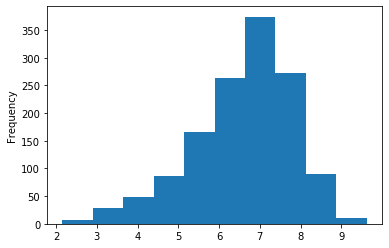

In [1]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test.xlsx')
data=data[data['path'].str.contains('/female/',na = False)]
x=data['mean']
plt.hist(x, bins=10)
plt.gca().set(ylabel='Frequency');


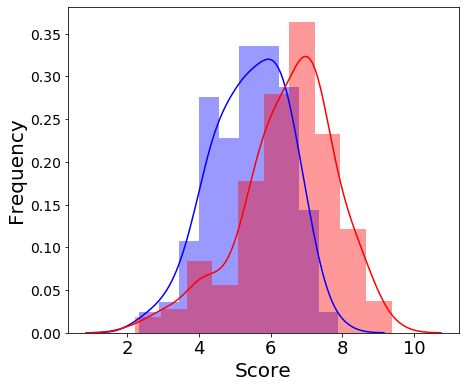

In [2]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns
data=pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test.xlsx')
#data=data['path'].str.replace('midestern', 'mideastern')
data = data[data['path'].str.contains('/indian/',na = False)]
male=data[data['path'].str.contains('/male/',na = False)]
female = data[data['path'].str.contains('/female/',na = False)]


plt.subplots(figsize=(7,6))
sns.distplot( male['mean'], color="blue", label="male", bins=10)
sns.distplot( female['mean'] , color="red", label="female", bins=10)

#plt.title('Iris Histogram')
#plt.rcParams.update({'axes.titlesize': 'large'})
plt.gca().set(ylabel='Frequency', xlabel = 'Score');
plt.savefig('in_distr.png')


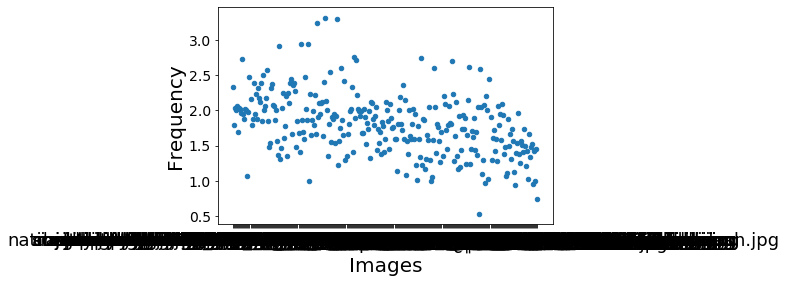

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test3.xlsx')
data['std']= data.std(axis=1)
data = data[data['path'].str.contains('/hispanic/',na = False)]
male=data[data['path'].str.contains('/female/',na = False)]
data.plot(x = 'image', y='std', kind = 'scatter')
plt.gca().set(ylabel='Frequency', xlabel = 'Images');
plt.show()

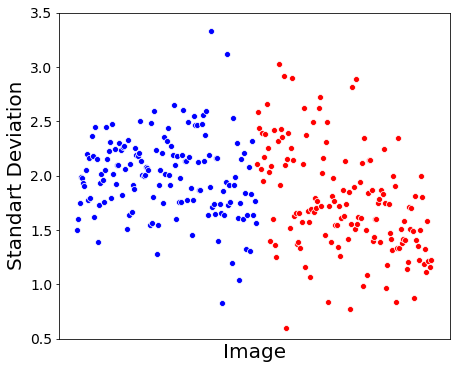

In [45]:
#show distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 14
import seaborn as sns
data=pd.read_excel('/home/ubuntu/ECUST_FBP/scores/test3.xlsx')
data['std']= data.std(axis=1)
data = data[data['path'].str.contains('/mideastern/',na = False)]

male=data[data['path'].str.contains('/male/',na = False)]
female = data[data['path'].str.contains('/female/',na = False)]


plt.subplots(figsize=(7,6))
sns.scatterplot( y = male['std'], x = male['image'], color="blue")
sns.scatterplot( y = female['std'] , x = female['image'], color="red")
#plt.title('Iris Histogram')
#plt.rcParams.update({'axes.titlesize': 'large'})
plt.gca().set(ylabel='Standart Deviation', xlabel = 'Image');
plt.ylim(0.5, 3.5)
plt.xticks([])
plt.savefig('mi_std.png')